In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [2]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [3]:
# Download cats and dogs dataset
URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('/content/cats_and_dogs.zip', origin=URL, extract=True)
!unzip '/content/cats_and_dogs.zip'

train_path = '/content/cats_and_dogs_filtered/train'
valid_path = '/content/cats_and_dogs_filtered/validation'

68616192/68606236 [==============================] - 2s 0us/step
Archive:  /content/cats_and_dogs.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jp

(500, 374)


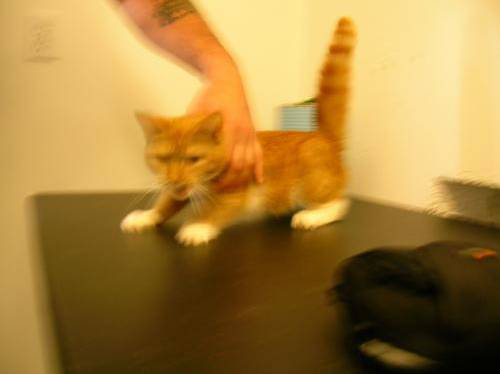

In [4]:
# Show image
img = Image.open('/content/cats_and_dogs_filtered/train/cats/cat.0.jpg')
print(img.size)
display(img)

In [5]:
# Data pre-processing
Datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=30,
                horizontal_flip=True, 
                fill_mode='nearest') 

train_generator = Datagen.flow_from_directory(train_path, target_size=(256,256), classes=['cats', 'dogs'], class_mode='binary')
valid_generator = Datagen.flow_from_directory(valid_path, target_size=(256,256), classes=['cats', 'dogs'], class_mode='binary')

print(train_generator.image_shape)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(256, 256, 3)


In [6]:
# Confirm cat and dog labels
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [7]:
LR_function=ReduceLROnPlateau(monitor='val_accuracy',
                patience=5,  # 5 epochs 內acc沒下降就要調整LR
                verbose=1,
                factor=0.5, # new_LR = LR * 0.5
                min_lr=1e-12 # 最小 LR 到1e-12就不再下降     
                ) 

In [8]:
# Build neural network
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(Adam(learning_rate=5e-6), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, validation_data=valid_generator, callbacks=[LR_function], epochs=100, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
63/63 - 75s - loss: 0.8411 - accuracy: 0.5485 - val_loss: 0.7106 - val_accuracy: 0.5000 - lr: 5.0000e-06 - 75s/epoch - 1s/step
Epoch 2/100
63/63 - 53s - loss: 0.6547 - accuracy: 0.6120 - val_loss: 0.8209 - val_accuracy: 0.5000 - lr: 5.0000e-06 - 53s/epoch - 835ms/step
Epoch 3/100
63/63 - 50s - loss: 0.6364 - accuracy: 0.6295 - val_loss: 0.8487 - val_accuracy: 0.5000 - lr: 5.0000e-06 - 50s/epoch - 797ms/step
Epoch 4/100
63/63 - 52s - loss: 0.6352 - accuracy: 0.6405 - val_loss: 0.9477 - val_accuracy: 0.5000 - lr: 5.0000e-06 - 52s/epoch - 819ms/step
Epoch 5/100
63/63 - 51s - loss: 0.6078 - accuracy: 0.6695 - val_loss: 0.8789 - val_accuracy: 0.5000 - lr: 5.0000e-06 - 51s/epoch - 803ms/step
Epoch 6/100
63/63 - 52s - loss: 0.5992 - accuracy: 0.6775 - val_loss: 0.8689 - val_accuracy: 0.5010 - lr: 5.0000e-06 - 52s/epoch - 820ms/step
Epoch 7/100
63/63 - 51s - loss: 0.5852 - accuracy: 0.6770 - val_loss: 0.9709 - val_accuracy: 0.5050 - lr: 5.0000e-06 - 51s/epoch - 805ms/step
Epoch 8/1

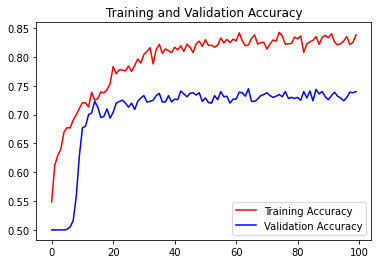

Final Accuracy : 0.8385000228881836.
Final validation accuracy : 0.7400000095367432.


In [9]:
epochs=range(100)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'r-',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

print(f"Final Accuracy : {acc[-1]}.")
print(f"Final validation accuracy : {val_acc[-1]}.")

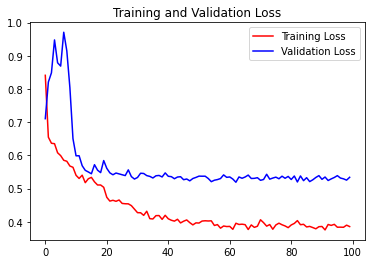

Final loss : 0.3855157494544983.
Final validation loss : 0.5339287519454956.


In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,'r-',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Final loss : {loss[-1]}.")
print(f"Final validation loss : {val_loss[-1]}.")

#Save and Load

In [11]:
model.save("cat-dog-model.h5")

In [12]:
load_model = keras.models.load_model("cat-dog-model.h5")
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 dropout (Dropout)           (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     7

#Prediction

(499, 323)


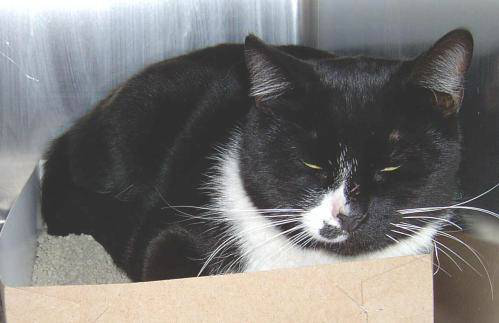

In [13]:
# Show image
img = Image.open('/content/cats_and_dogs_filtered/validation/cats/cat.2001.jpg')
print(img.size)
display(img)

In [14]:
def predict_label(list):
  if list[0][0] < 0.5:
    return "Cat"
  return "Dog"

Cat


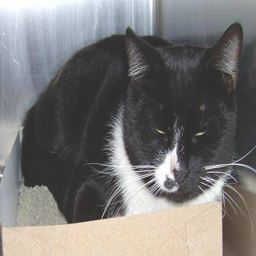

In [15]:
# 圖片縮放寬高為 (256, 256) 
img = img.resize((256, 256))

# 加一維，變成 (1, 256, 256, 3)，最後一維是色彩
x = image.img_to_array(img).astype('float32')/255
x = np.expand_dims(x, axis=0)

print(predict_label(model.predict(x)))
display(img)